## Observations and Insights 

In [1]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = data_combined["Mouse ID"].count()
total_mice

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unduplicated_mice = data_combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
unduplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
unduplicated_mice["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and standard error of the mean of the tumor volume.

mean_drug = unduplicated_mice.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
mean_drug

med_drug = unduplicated_mice.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
med_drug

var_drug = unduplicated_mice.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
var_drug

sd_drug = unduplicated_mice.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sd_drug

sem_drug = unduplicated_mice.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
sem_drug

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
#the tumor volume for each regimen

tumor_drug = pd.DataFrame({"Mean": mean_drug,
                           "Median": med_drug,
                           "Variance": var_drug,
                           "Standard Deviation": sd_drug,
                           "Standard Error of Mean": sem_drug
                          })
tumor_drug

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_drug = unduplicated_mice[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_drug.rename(columns={"mean": "Mean", 
                          "median": "Median", 
                         "var": "Variance", 
                         "std": "Standard Diviation", 
                         "sem": "Standard Error of the Mean"})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Diviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                                         
             Standard Error of the Mean  
Drug Regimen                             
Capomulin                      0.329346  
Ceftamin                       0.469821  
Infubinol                      0.492236  
Ketapril                       0.603860  
Naftisol                       0.596466  
Placebo                        0.581331  
Propriva                       0.525862  
Ramicane                       0.320955  
Stelasyn                       0.573111  
Zoniferol                      0.516398

## Bar and Pie Charts

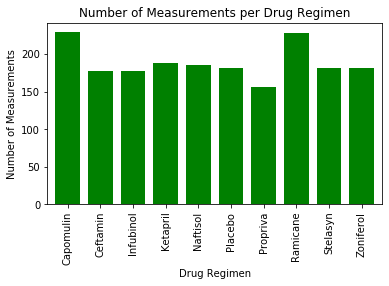

In [30]:
plt.close()
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Create chart
drugs = unduplicated_mice.groupby("Drug Regimen")
count_drugs = drugs['Drug Regimen'].count()
drug_count_chart2 = count_drugs.plot(kind='bar', color="green", width=0.75)

#Set Lables
drug_count_chart2.set_xlabel("Drug Regimen")
drug_count_chart2.set_ylabel("Number of Measurements")
drug_count_chart2.set_title("Number of Measurements per Drug Regimen")

#Scale chart
plt.gcf().subplots_adjust(bottom=0.25)

plt.show()

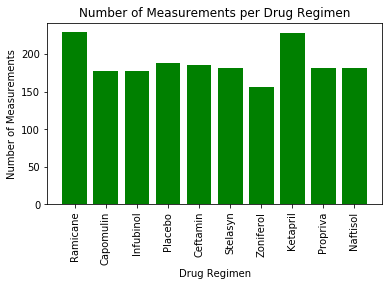

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# dr_labels = unduplicated_mice.groupby("Drug Regimen")
# count_dr_labels = dr_labels["Mouse ID"].count()
# count_dr_labels

#Create x and y axis
drug_count = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = np.arange(len(drug_count))

#Create bar chart
plt.bar(x_axis, drug_count, color='green', align="center")

# Create list for labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 
                            'Ketapril', 'Propriva', 'Naftisol'], rotation=90)

#Scale chart
plt.gcf().subplots_adjust(bottom=0.25)

#Chart Labels
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()

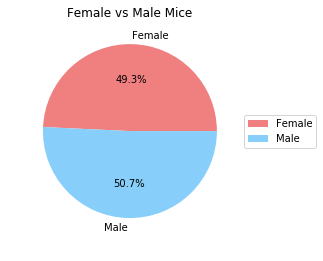

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.close()

#Find number of males and females and create list
sex_of_mice = unduplicated_mice.groupby('Sex')
count_of_mice = sex_of_mice['Sex'].count()
count_of_mice.plot(kind="pie", autopct="%1.1f%%", colors= ["lightcoral", "lightskyblue"])

#Chart Title
plt.title("Female vs Male Mice")
plt.xlabel(" ")
plt.ylabel(" ")

#Chart Legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

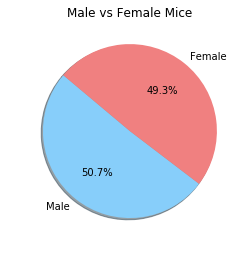

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.close()

#create list for lables & title
labels = ["Male", "Female"] 

#Find number of males and females and create list
# sex_of_mice = unduplicated_mice.groupby("Sex").count()
# sex_of_mice.head()
sizes = [958, 930]

#Colors of each section 
colors = ["lightskyblue", "lightcoral"]

# Set explode distance
explode = (0.1, 0,)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Labels
plt.title("Male vs Female Mice")
plt.xlabel(" ")
plt.ylabel(" ")

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = unduplicated_mice.groupby("Mouse ID").max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor = pd.merge(max_timepoint, unduplicated_mice, on="Mouse ID", suffixes=("_Max", ""))
finfin_tum = final_tumor.drop(columns=["Drug Regimen_Max", "Sex_Max", "Age_months_Max", "Weight (g)_Max", "Tumor Volume (mm3)_Max", "Metastatic Sites_Max", "Sex", "Age_months", "Weight (g)", "Metastatic Sites"])
finfin_tum

,Mouse ID,Timepoint_Max,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,45,Infubinol,0,45.000000
1,a203,45,Infubinol,5,48.508468
2,a203,45,Infubinol,10,51.852437
3,a203,45,Infubinol,15,52.777870
4,a203,45,Infubinol,20,55.173336
...,...,...,...,...,...
1883,z969,45,Naftisol,25,63.145652
1884,z969,45,Naftisol,30,65.841013
1885,z969,45,Naftisol,35,69.176246
1886,z969,45,Naftisol,40,70.314904


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = finfin_tum.loc[finfin_tum["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)

    # Do quartile calculations for each drug
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'{drug}:')
    print(f'The lower quartile range is: {lowerq}')
    print(f'The upper quartile range is: {upperq}')
    print(f'The interquartile range is: {iqr}')
    print(f'The lower bound is: {lower_bound}')
    print(f'The upper bound is: {upper_bound}')
    print(f'____________________________________')
    print('')
    
    
#     # Determine outliers using upper and lower bounds
#     quartiles = final_tumor_vol.quantile([.25,.5,.75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
#     outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
#     print(f"{drug}'s potential outliers: {outliers}")

Capomulin:
The lower quartile range is: 37.685932865
The upper quartile range is: 45.0
The interquartile range is: 7.314067135000002
The lower bound is: 26.714832162499995
The upper bound is: 55.9711007025
____________________________________

Ramicane:
The lower quartile range is: 36.67463458499999
The upper quartile range is: 45.0
The interquartile range is: 8.325365415000007
The lower bound is: 24.18658646249998
The upper bound is: 57.48804812250001
____________________________________

Infubinol:
The lower quartile range is: 47.3123533
The upper quartile range is: 57.314443967500004
The interquartile range is: 10.002090667500006
The lower bound is: 32.309217298749985
The upper bound is: 72.31757996875001
____________________________________

Ceftamin:
The lower quartile range is: 47.208427112500004
The upper quartile range is: 56.801437570000004
The interquartile range is: 9.5930104575
The lower bound is: 32.818911426250004
The upper bound is: 71.19095325625
_______________________

In [14]:
# # Put treatments into a list for for loop (and later for plot labels)
# treatment_list = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# treatment_df = finfin_tum[finfin_tum['Drug Regimen'].isin(treatment_list)]

# treatment_grouped = treatment_df.groupby(['Drug Regimen', 'Mouse ID']).agg(\
#                                                              Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1]))

# treatment_grouped

# treatment_reorg = treatment_grouped.stack(level=0).unstack(level=0)
# treatment_reorg.head()

# # Do quartile calculations for each drug
# for x in treatment_list:
#     quartiles = treatment_reorg[x].quantile([.25,.5,.75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
#     print(f'{x}:')
#     print(f'The lower quartile range is: {lowerq}')
#     print(f'The upper quartile range is: {upperq}')
#     print(f'The interquartile range is: {iqr}')
#     print(f'The lower bound is: {lower_bound}')
#     print(f'The upper bound is: {upper_bound}')
#     print(f'____________________________________')
#     print('')

In [17]:
# # Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_list = []

# #fill list
# for x in treatment_list:
#     tumor_vol_list.append(list(treatment_reorg[x].dropna()))

#     print(tumor_vol_list)

([<matplotlib.axis.XTick at 0x7fb640ed3400>,
 <a list of 4 Text xticklabel objects>)

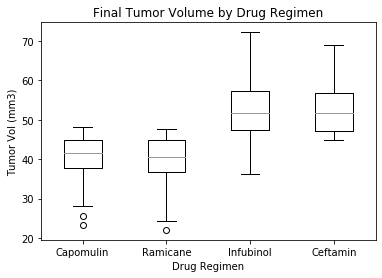

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Vol (mm3)')
ax1.boxplot(tumor_vol_list)
plt.xticks([1,2,3,4],treatment_list)

## Line and Scatter Plots

In [19]:
#Find all mice that have taken Capomulin
cap_mice = unduplicated_mice.loc[unduplicated_mice['Drug Regimen'] == 'Capomulin']
cap_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [20]:
#Select one mouse and create new df
mouse = unduplicated_mice.loc[unduplicated_mice['Mouse ID'] == 'i557']
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


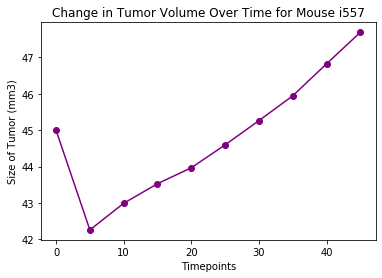

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Define variables
x_axis = mouse['Timepoint']
y_axis = mouse['Tumor Volume (mm3)']

# Create a graph based upon the list and array we have created
plt.plot(x_axis, y_axis, marker='o', color="purple")

# Labels
plt.xlabel('Timepoints')
plt.ylabel('Size of Tumor (mm3)')
plt.title('Change in Tumor Volume Over Time for Mouse i557')

# Show the graph that we have created
plt.show()

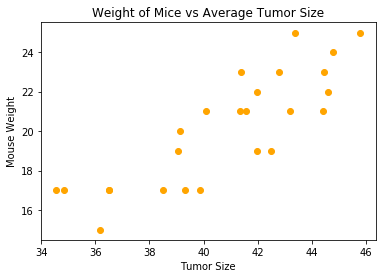

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Define Variables

#Find average tumor volume for each mouse that was given Capomulin
av_tum_vol = cap_mice.groupby('Mouse ID').mean()["Tumor Volume (mm3)"]
av_tum_vol

#Weight of mice on Capomulin 
#(Instructions unclear on how we are meant to deal with weight of mice)
mice_lbs = cap_mice.groupby('Mouse ID').median()['Weight (g)']
mice_lbs

#Create scatter plot
plt.scatter(av_tum_vol, mice_lbs, color="orange")

# Labels
plt.xlabel('Tumor Size')
plt.ylabel('Mouse Weight')
plt.title('Weight of Mice vs Average Tumor Size')

plt.show()

## Correlation and Regression

The correlation between average tumor weight and mice weight is 0.84 for the Capomulin regimen


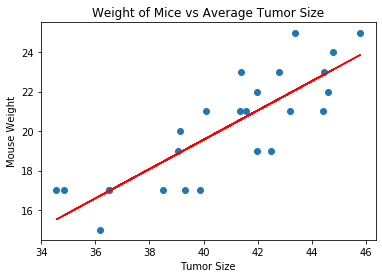

In [23]:
#Use chart from above
plt.scatter(av_tum_vol, mice_lbs)
plt.xlabel('Tumor Size')
plt.ylabel('Mouse Weight')
plt.title('Weight of Mice vs Average Tumor Size')

# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(av_tum_vol, mice_lbs)
print(f"The correlation between average tumor weight and mice weight is {round(correlation[0],2)} for the Capomulin regimen")

(slope, intercept, rvalue, pvalue, stderr) = linregress(av_tum_vol, mice_lbs)
regression_values = av_tum_vol * slope + intercept
plt.plot(av_tum_vol,regression_values,"r-")

plt.show()